In [1]:
%matplotlib widget
import matplotlib.pyplot as plt


In [9]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Load the CSV file
df = pd.read_csv("complex_n_silicon_2dsweep_v2.csv")

# Extract the data
k_si = df["k_si"].unique()
n_si = df["n_si"].unique()
pte = df["pte_8"].values.reshape(len(k_si), len(n_si)).T

# Create a meshgrid
X, Y = np.meshgrid(k_si, n_si)

# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=pte)])

# Update the layout with a larger scene
fig.update_layout(
    title="Photon Transport Efficiency vs Complex Reflective Index of Silicon",
    scene=dict(
        xaxis_title="k_si",
        yaxis_title="n_si",
        zaxis_title="PTE",
        aspectmode="cube",  # This ensures the plot is a cube
        aspectratio=dict(x=1, y=1, z=0.7),  # Adjust the z ratio if needed
        camera=dict(eye=dict(x=1.5, y=1.5, z=1)),  # Adjust the camera position
    ),
    width=1000,  # Increased width
    height=800,  # Increased height
    margin=dict(l=0, r=0, b=0, t=40),  # Reduce margins to maximize plot area
)

# Show the plot
fig.show()

In [34]:
noreflector_pte_8 = 0.001405
noreflector_pte_4 = 0.00129
A_alpha_8 = 2.1  # alpha amplitude ratio
A_alpha_4 = 1.4

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Load the CSV file
df = pd.read_csv("complex_n_silicon_2dsweep_v2.csv")

# Extract the data
k_si = df["k_si"].unique()
n_si = df["n_si"].unique()
pte_8 = df["pte_8"].values.reshape(len(k_si), len(n_si)).T
pte_4 = df["pte_4"].values.reshape(len(k_si), len(n_si)).T
score = -(
    (A_alpha_8 - pte_8 / noreflector_pte_8) ** 2
    + (A_alpha_4 - pte_4 / noreflector_pte_4) ** 2
)


# Create a meshgrid
X, Y = np.meshgrid(k_si, n_si)

# Create the 3D surface plot
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=score)])

# Update the layout with a larger scene
fig.update_layout(
    title="Photon Transport Efficiency vs Complex Reflective Index of Silicon",
    scene=dict(
        xaxis_title="k_si",
        yaxis_title="n_si",
        zaxis_title="Score",
        aspectmode="cube",  # This ensures the plot is a cube
        aspectratio=dict(x=1, y=1, z=0.7),  # Adjust the z ratio if needed
        # zaxis=dict(range=[-.02, 0]),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1)),  # Adjust the camera position
    ),
    width=1000,  # Increased width
    height=800,  # Increased height
    margin=dict(l=0, r=0, b=0, t=40),  # Reduce margins to maximize plot area
)

# Show the plot
fig.show()

In [35]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the CSV file
df = pd.read_csv("complex_n_silicon_2dsweep_v2.csv")

# Get unique n_si values
n_si_unique = sorted(df["n_si"].unique())

# Calculate number of rows and columns for subplots
n_plots = len(n_si_unique)
n_cols = 3  # You can adjust this
n_rows = -(-n_plots // n_cols)  # Ceiling division

# Create subplots
fig = make_subplots(
    rows=n_rows, cols=n_cols, subplot_titles=[f"n_si = {n:.2f}" for n in n_si_unique]
)

# Create a plot for each n_si value
for i, n_si in enumerate(n_si_unique):
    row = i // n_cols + 1
    col = i % n_cols + 1

    # Filter data for this n_si
    data = df[df["n_si"] == n_si].sort_values("k_si")

    # Add trace to subplot
    fig.add_trace(
        go.Scatter(x=data["k_si"], y=data["pte_8"], mode="lines"), row=row, col=col
    )

    # Update axes labels
    fig.update_xaxes(title_text="k_si", row=row, col=col)
    fig.update_yaxes(title_text="PTE", row=row, col=col)

# Update layout
fig.update_layout(
    title_text="PTE vs k_si for different n_si values",
    height=300 * n_rows,  # Adjust height based on number of rows
    width=1000,  # You can adjust this
    showlegend=False,
)

# Show the plot
fig.show()

In [36]:
# Flatten the arrays for easier processing
flat_k_si = X.flatten()
flat_n_si = Y.flatten()
flat_score = score.flatten()

# Create a DataFrame with the flattened data
result_df = pd.DataFrame({"n_si": flat_n_si, "k_si": flat_k_si, "score": flat_score})

# Group by n_si and find the row with the maximum score for each group
best_scores = result_df.loc[result_df.groupby("n_si")["score"].idxmax()]

# Sort the results by n_si for better readability
best_scores = best_scores.sort_values("n_si")

# Print the results
print("n_si\t\tk_si\t\tScore")
print("-" * 40)
for _, row in best_scores.iterrows():
    print(f"{row['n_si']:.6f}\t{row['k_si']:.6f}\t{row['score']:.6f}")

# Find the overall best score
overall_best = best_scores.loc[best_scores["score"].idxmax()]
print("\nOverall best:")
print(f"n_si: {overall_best['n_si']:.6f}")
print(f"k_si: {overall_best['k_si']:.6f}")
print(f"Score: {overall_best['score']:.6f}")

n_si		k_si		Score
----------------------------------------
0.500000	0.984848	-0.404489
0.518519	0.944444	-0.358018
0.537037	0.904040	-0.326186
0.555556	0.904040	-0.282939
0.574074	0.904040	-0.226878
0.592593	0.823232	-0.198359
0.611111	0.904040	-0.157974
0.629630	0.762626	-0.139870
0.648148	0.883838	-0.106289
0.666667	0.782828	-0.081591
0.685185	0.924242	-0.069107
0.703704	0.722222	-0.067744
0.722222	0.762626	-0.060550
0.740741	0.803030	-0.054388
0.759259	0.904040	-0.045905
0.777778	0.944444	-0.041882
0.796296	0.843434	-0.036248
0.814815	0.762626	-0.026862
0.833333	0.883838	-0.018680
0.851852	0.964646	-0.020437
0.870370	1.045455	-0.020437
0.888889	1.106061	-0.019417
0.907407	1.166667	-0.017867
0.925926	1.207071	-0.017867
0.944444	1.388889	-0.017577
0.962963	1.429293	-0.017577
0.981481	1.469697	-0.016976
1.000000	1.510101	-0.016976
1.018519	1.570707	-0.016610
1.037037	1.611111	-0.016769
1.055556	1.631313	-0.015907
1.074074	1.671717	-0.014073
1.092593	1.712121	-0.014979
1.111111	1.732323

In [37]:
best_scores["n_si"].array

<PandasArray>
[               0.5, 0.5185185185185185,  0.537037037037037,
 0.5555555555555556, 0.5740740740740741, 0.5925925925925926,
 0.6111111111111112, 0.6296296296296297, 0.6481481481481481,
 0.6666666666666666, 0.6851851851851851, 0.7037037037037037,
 0.7222222222222222, 0.7407407407407407, 0.7592592592592593,
 0.7777777777777778, 0.7962962962962963, 0.8148148148148148,
 0.8333333333333333, 0.8518518518518519, 0.8703703703703703,
 0.8888888888888888, 0.9074074074074074,  0.925925925925926,
 0.9444444444444444, 0.9629629629629628, 0.9814814814814814,
                1.0, 1.0185185185185186,  1.037037037037037,
 1.0555555555555556,  1.074074074074074, 1.0925925925925926,
 1.1111111111111112, 1.1296296296296295,  1.148148148148148,
 1.1666666666666663, 1.1851851851851851, 1.2037037037037035,
 1.2222222222222223, 1.2407407407407407,  1.259259259259259,
 1.2777777777777777, 1.2962962962962965, 1.3148148148148149,
 1.3333333333333333,  1.351851851851852, 1.3703703703703702,
 1.3888888

In [38]:
np.asarray(best_scores["k_si"].array)

array([0.98484848, 0.94444444, 0.9040404 , 0.9040404 , 0.9040404 ,
       0.82323232, 0.9040404 , 0.76262626, 0.88383838, 0.78282828,
       0.92424242, 0.72222222, 0.76262626, 0.8030303 , 0.9040404 ,
       0.94444444, 0.84343434, 0.76262626, 0.88383838, 0.96464646,
       1.04545455, 1.10606061, 1.16666667, 1.20707071, 1.38888889,
       1.42929293, 1.46969697, 1.51010101, 1.57070707, 1.61111111,
       1.63131313, 1.67171717, 1.71212121, 1.73232323, 1.75252525,
       1.79292929, 1.81313131, 1.83333333, 1.85353535, 1.87373737,
       1.89393939, 1.91414141, 1.93434343, 1.97474747, 1.99494949,
       2.01515152, 2.01515152, 2.03535354, 2.05555556, 2.07575758,
       2.0959596 , 2.11616162, 2.13636364, 2.13636364, 2.15656566])

In [39]:
import plotly.express as px

plt.scatter(
    np.asarray(best_scores["n_si"].array), np.asarray(best_scores["k_si"].array)
)

In [23]:
def reflectance(theta, n, k):
    nxe = 1.64
    nsi = n + 1j * k

    R_s = (
        np.abs(
            (nxe * np.cos(theta) - nsi * np.sqrt(1 - (nxe / nsi * np.sin(theta)) ** 2))
            / (
                nxe * np.cos(theta)
                + nsi * np.sqrt(1 - (nxe / nsi * np.sin(theta)) ** 2)
            )
        )
        ** 2
    )

    R_p = (
        np.abs(
            (nxe * np.sqrt(1 - (nxe / nsi * np.sin(theta)) ** 2) - nsi * np.cos(theta))
            / (
                nxe * np.sqrt(1 - (nxe / nsi * np.sin(theta)) ** 2)
                + nsi * np.cos(theta)
            )
        )
        ** 2
    )
    return R_s, R_p, 0.5 * (R_s + R_p)

In [31]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Constants
noreflector_pte_8 = 0.001405
noreflector_pte_4 = 0.00129
A_alpha_8 = 2.1  # alpha amplitude ratio
A_alpha_4 = 1.8

lit_value = (1.902, 0.8398)


# Load the CSV file
df = pd.read_csv(
    "./Chroma-Scripts/si-index-of-refraction-sweep/complex_n_silicon_2dsweep_v2.csv"
)

# Extract the data
k_si = df["k_si"].unique()
n_si = df["n_si"].unique()
pte_8 = df["pte_8"].values.reshape(len(k_si), len(n_si)).T
pte_4 = df["pte_4"].values.reshape(len(k_si), len(n_si)).T

# Calculate the score
score = -(
    (A_alpha_8 - pte_8 / noreflector_pte_8) ** 2
    + (A_alpha_4 - pte_4 / noreflector_pte_4) ** 2
)


# Find the minimum and maximum scores
score_min = np.min(score)
score_max = np.max(score)

# Create a custom color scale
# This will create a sharp gradient near the maximum (which is close to 0 in your case)
colors = [
    (0, "rgb(0,0,130)"),
    (0.3, "rgb(0,60,200)"),
    # (0.5, "rgb(0, 255, 0)"),
    (0.8, "rgb(5,255,255)"),
    (0.85, "rgb(255,255,0)"),
    (0.9, "rgb(250,0,0)"),
    (0.95, "rgb(255,0,0)"),
    (1, "rgb(255,255,255)"),
]

# Create the heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=score,
        x=k_si,
        y=n_si,
        colorscale=colors,
        colorbar=dict(title="Score"),
        zmin=score_min,
        zmax=score_max,
    )
)

fig.add_trace(
    go.Scatter(
        x=[lit_value[0]],
        y=[lit_value[1]],
        mode="markers+text",
        marker=dict(
            size=20,
            color="black",
            line=dict(width=2, color="black"),
            symbol="hexagram-open-dot",
        ),
        name="Literature Value",
        text=["Literature Value"],
        textposition="bottom center",
    )
)

K, N = np.meshgrid(k_si, n_si)

# Calculate reflectance for all combinations
R_s, R_p, R_avg = reflectance(0.866, N, K)

fig.add_trace(
    go.Contour(
        z=R_avg,
        x=k_si,
        y=n_si,
        contours=dict(
            start=0,
            end=1,
            size=0.05,
            coloring="lines",
            showlabels=True,
            labelfont=dict(size=12, color="white"),
        ),
        # colorbar=dict(title="Reflectance"),
        line=dict(width=2),
        colorscale="Viridis",
    )
)

# Update the layout
fig.update_layout(
    title="Score vs Complex Refractive Index of Silicon",
    xaxis_title="k_si",
    yaxis_title="n_si",
    width=1000,
    height=800,
    font=dict(size=23),
)

# Show the plot
fig.show()

# Find the maximum score and its corresponding n_si and k_si
max_score = np.max(score)
max_index = np.unravel_index(score.argmax(), score.shape)
best_n_si = n_si[max_index[0]]
best_k_si = k_si[max_index[1]]

print(f"Best score: {max_score:.6f}")
print(f"Best n_si: {best_n_si:.6f}")
print(f"Best k_si: {best_k_si:.6f}")

Best score: -0.023005
Best n_si: 0.851852
Best k_si: 1.631313


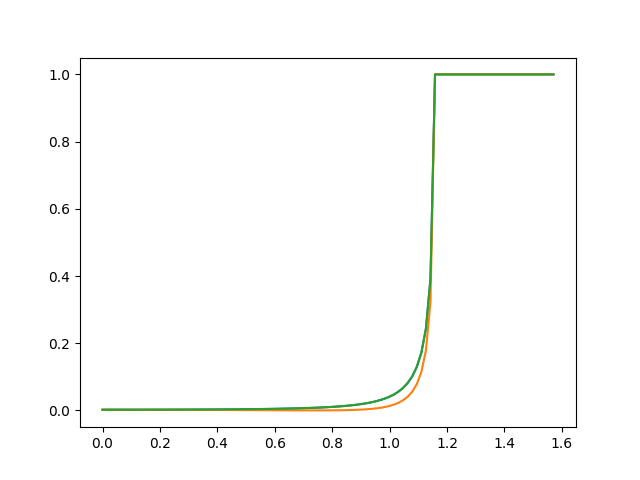

In [17]:
def reflectance(theta, n, k):
    nxe = 1.64
    nsi = n + 1j * k

    R_s = (
        np.abs(
            (nxe * np.cos(theta) - nsi * np.sqrt(1 - (nxe / nsi * np.sin(theta)) ** 2))
            / (
                nxe * np.cos(theta)
                + nsi * np.sqrt(1 - (nxe / nsi * np.sin(theta)) ** 2)
            )
        )
        ** 2
    )

    R_p = (
        np.abs(
            (nxe * np.sqrt(1 - (nxe / nsi * np.sin(theta)) ** 2) - nsi * np.cos(theta))
            / (
                nxe * np.sqrt(1 - (nxe / nsi * np.sin(theta)) ** 2)
                + nsi * np.cos(theta)
            )
        )
        ** 2
    )
    return R_s, R_p, 0.5 * (R_s + R_p)


import matplotlib.pyplot as plt

n = 1.5
k = 0
theta = np.linspace(0, np.pi / 2, 100)
plt.figure()
rs, rp, r = reflectance(theta, n, k)
plt.plot(theta, rs)
plt.plot(theta, rp)

plt.plot(theta, rs)

plt.show()

In [20]:
N, K = np.meshgrid(n_si, k_si)

# Calculate reflectance for all combinations
R_s, R_p, R_avg = reflectance(np.pi / 4, N, K)

# Create the heatmap
fig = go.Figure(
    data=go.Heatmap(
        z=R_avg,
        x=k_si,
        y=n_si,
        colorbar=dict(title="Reflectance"),
    )
)

# Update the layout
fig.update_layout(
    title="Average Reflectance vs Complex Refractive Index of Silicon (θ = π/4)",
    xaxis_title="k (imaginary part)",
    yaxis_title="n (real part)",
    width=1000,
    height=800,
    font=dict(size=18),
)

# Show the plot
fig.show()

In [22]:
# Create the contour plot
fig = go.Figure(
    data=go.Contour(
        z=R_avg,
        x=k_si,
        y=n_si,
        colorbar=dict(title="Reflectance"),
        contours=dict(start=0, end=1, size=0.05, coloring="heatmap"),
    )
)

# Update the layout
fig.update_layout(
    title="Average Reflectance vs Complex Refractive Index of Silicon (θ = π/4)",
    xaxis_title="k (imaginary part)",
    yaxis_title="n (real part)",
    width=1000,
    height=800,
    font=dict(size=18),
)

# Show the plot
fig.show()

In [33]:
score_max

-0.03711025507263362

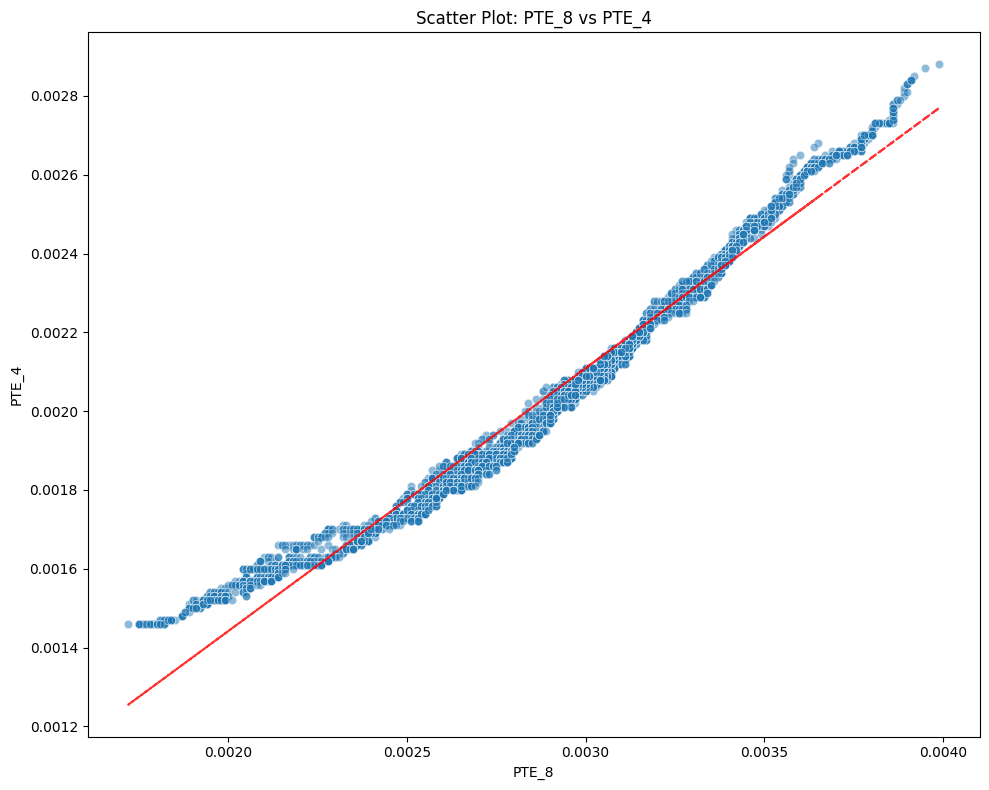

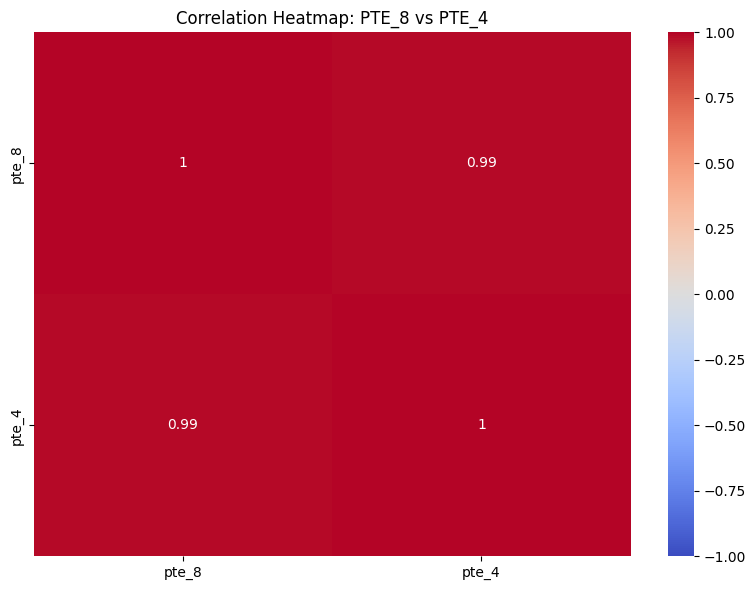

Pearson Correlation Coefficient: 0.9862
Pearson p-value: 0.0000e+00
Spearman Rank Correlation: 0.9982
Spearman p-value: 0.0000e+00

Mean PTE_8: 0.002921
Mean PTE_4: 0.002056
Std Dev PTE_8: 0.000471
Std Dev PTE_4: 0.000318
Min PTE_8: 0.001720
Min PTE_4: 0.001460
Max PTE_8: 0.003990
Max PTE_4: 0.002880

Mean PTE_8/PTE_4 ratio: 1.4186
Std Dev of PTE_8/PTE_4 ratio: 0.0462


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the CSV file
df = pd.read_csv("complex_n_silicon_2dsweep_v2.csv")

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df["pte_8"], df["pte_4"])

# Calculate Spearman rank correlation
spearman_corr, spearman_p = stats.spearmanr(df["pte_8"], df["pte_4"])

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x="pte_8", y="pte_4", data=df, alpha=0.5)
plt.title("Scatter Plot: PTE_8 vs PTE_4")
plt.xlabel("PTE_8")
plt.ylabel("PTE_4")

# Add a line of best fit
z = np.polyfit(df["pte_8"], df["pte_4"], 1)
p = np.poly1d(z)
plt.plot(df["pte_8"], p(df["pte_8"]), "r--", alpha=0.8)

plt.tight_layout()
plt.show()

# Create a heatmap of the correlation matrix
correlation_matrix = df[["pte_8", "pte_4"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation Heatmap: PTE_8 vs PTE_4")
plt.tight_layout()
plt.show()

# Print the results
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"Pearson p-value: {p_value:.4e}")
print(f"Spearman Rank Correlation: {spearman_corr:.4f}")
print(f"Spearman p-value: {spearman_p:.4e}")

# Calculate and print additional statistics
print(f"\nMean PTE_8: {df['pte_8'].mean():.6f}")
print(f"Mean PTE_4: {df['pte_4'].mean():.6f}")
print(f"Std Dev PTE_8: {df['pte_8'].std():.6f}")
print(f"Std Dev PTE_4: {df['pte_4'].std():.6f}")
print(f"Min PTE_8: {df['pte_8'].min():.6f}")
print(f"Min PTE_4: {df['pte_4'].min():.6f}")
print(f"Max PTE_8: {df['pte_8'].max():.6f}")
print(f"Max PTE_4: {df['pte_4'].max():.6f}")

# Calculate the ratio of PTE_8 to PTE_4
df["pte_ratio"] = df["pte_8"] / df["pte_4"]
print(f"\nMean PTE_8/PTE_4 ratio: {df['pte_ratio'].mean():.4f}")
print(f"Std Dev of PTE_8/PTE_4 ratio: {df['pte_ratio'].std():.4f}")

In [32]:
from uncertainties import ufloat

a = ufloat(0.0017, 0.00005)
b = ufloat(0.0015, 0.00005)
c = ufloat(0.0013, 0.00005)
d = ufloat(0.0012, 0.00005)
(a / b) ** 2 + (c / d) ** 2

2.4580555555555557+/-0.1753743815905803

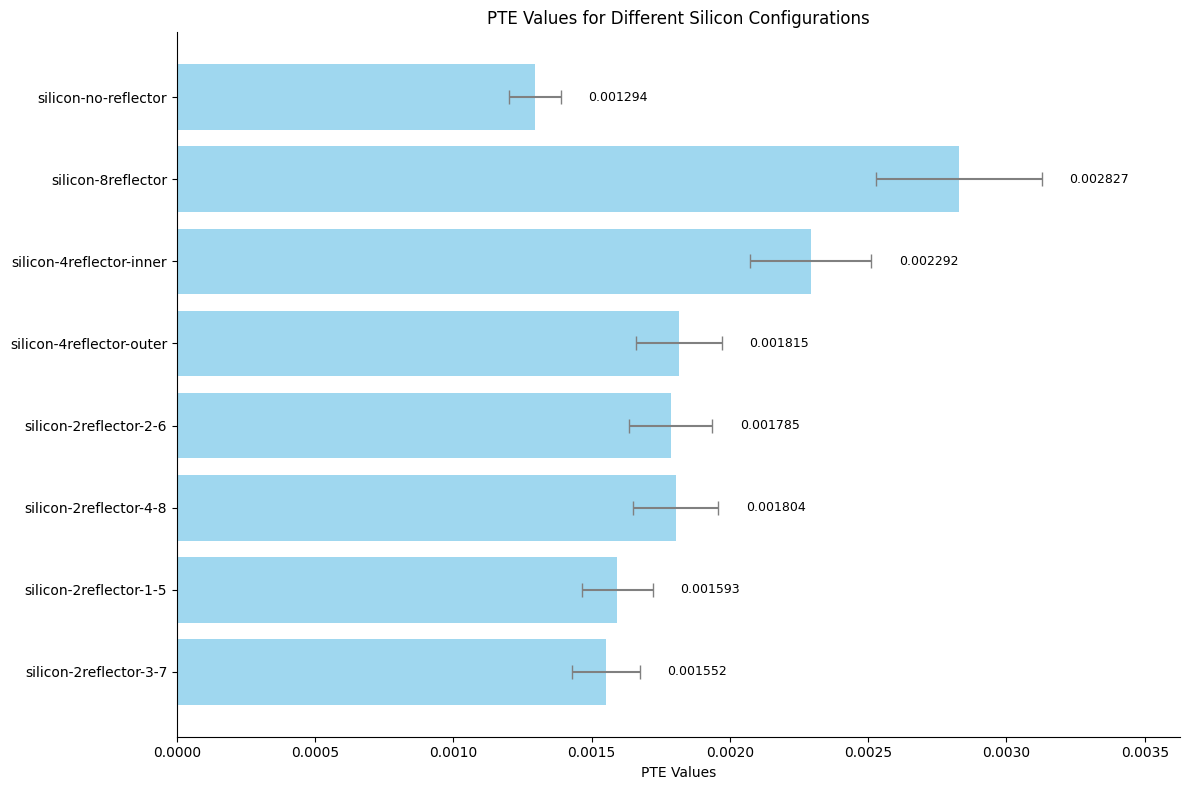

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = [
    "silicon-tall-no-reflector",
    "silicon-tall-8reflector",
    "silicon-tall-4reflector-inner",
    "silicon-tall-4reflector-outer",
    "silicon-tall-2reflector-2-6",
    "silicon-tall-2reflector-4-8",
    "silicon-tall-2reflector-1-5",
    "silicon-tall-2reflector-3-7",
]
ptes = [0.001294, 0.002827, 0.002292, 0.001815, 0.001785, 0.001804, 0.001593, 0.001552]
pteerr = [
    9.309608335477922e-05,
    0.0003006205800207298,
    0.00021945825195694967,
    0.00015464822501406217,
    0.0001508298594443421,
    0.00015324446435679168,
    0.0001271609194210234,
    0.00012228341846710043,
]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))
y = np.arange(len(labels))
bars = ax.barh(
    y,
    ptes,
    xerr=pteerr,
    align="center",
    alpha=0.8,
    capsize=5,
    color="skyblue",
    ecolor="gray",
)

# Customize the chart
ax.set_xlabel("PTE Values")
ax.set_title("PTE Values for Different Silicon Configurations")
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add value labels to the right of each bar, after the error bars
for bar in bars:
    width = bar.get_width()
    error = pteerr[bars.index(bar)]
    ax.text(
        width + error + 0.0001,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.6f}",
        ha="left",
        va="center",
        fontsize=9,
    )

# Adjust x-axis to make room for labels
plt.xlim(0, max(ptes) + max(pteerr) + 0.0005)

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

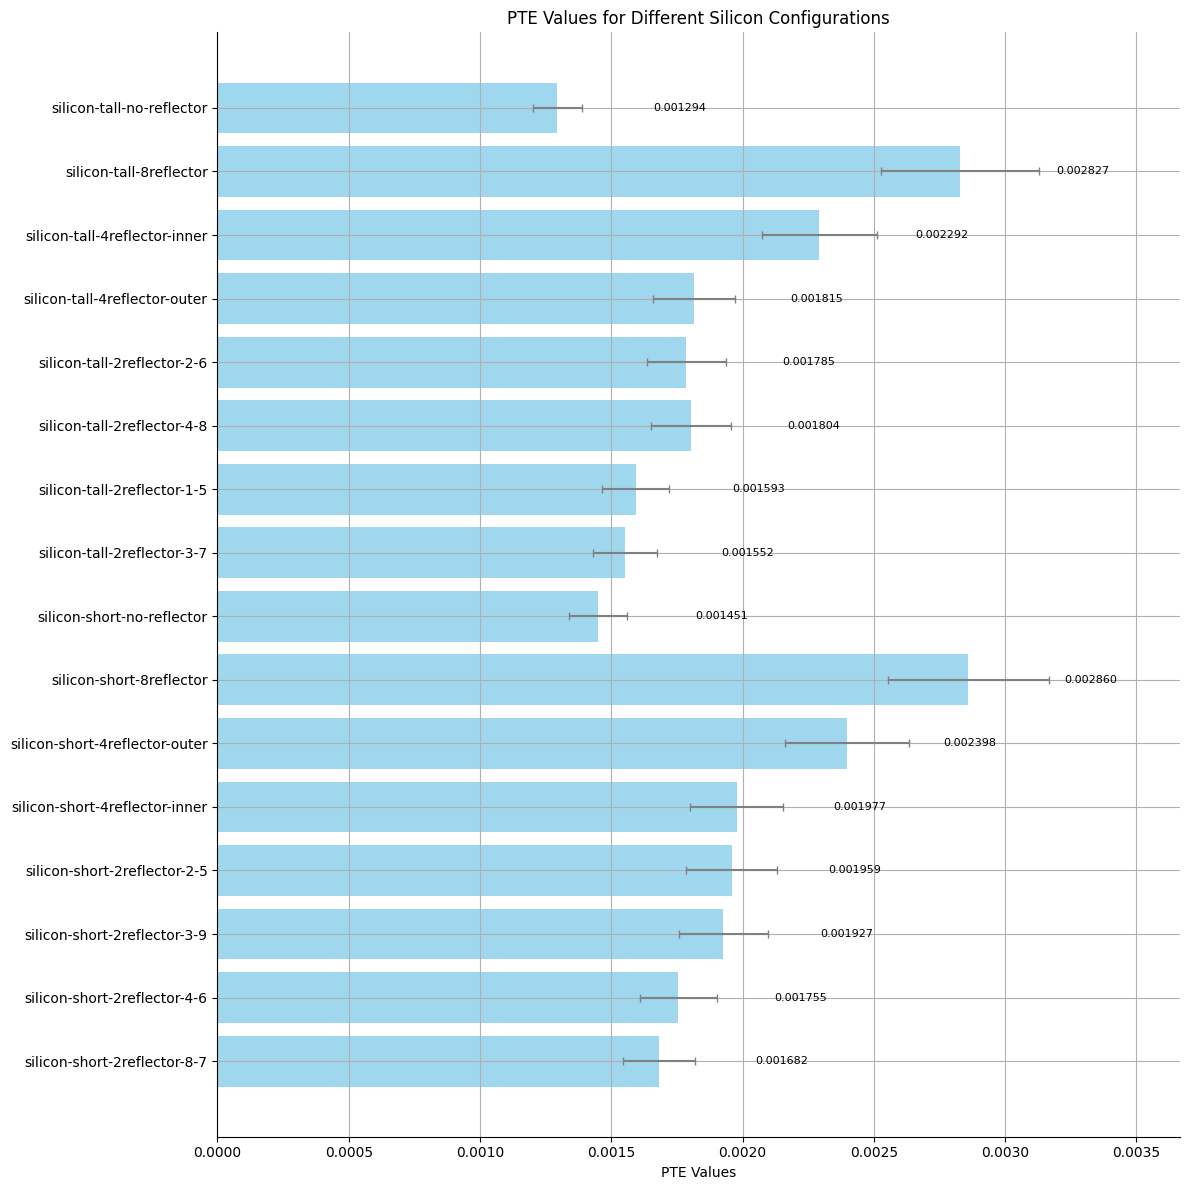

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Combine all data
labels = [
    "silicon-tall-no-reflector",
    "silicon-tall-8reflector",
    "silicon-tall-4reflector-inner",
    "silicon-tall-4reflector-outer",
    "silicon-tall-2reflector-2-6",
    "silicon-tall-2reflector-4-8",
    "silicon-tall-2reflector-1-5",
    "silicon-tall-2reflector-3-7",
    "silicon-short-no-reflector",
    "silicon-short-8reflector",
    "silicon-short-4reflector-outer",
    "silicon-short-4reflector-inner",
    "silicon-short-2reflector-2-5",
    "silicon-short-2reflector-3-9",
    "silicon-short-2reflector-4-6",
    "silicon-short-2reflector-8-7",
]

ptes = [
    0.001294,
    0.002827,
    0.002292,
    0.001815,
    0.001785,
    0.001804,
    0.001593,
    0.001552,
    0.001451,
    0.00286,
    0.002398,
    0.001977,
    0.001959,
    0.001927,
    0.001755,
    0.001682,
]

pteerr = [
    9.309608335477922e-05,
    0.0003006205800207298,
    0.00021945825195694967,
    0.00015464822501406217,
    0.0001508298594443421,
    0.00015324446435679168,
    0.0001271609194210234,
    0.00012228341846710043,
    0.00011054296632531625,
    0.0003058996959789271,
    0.0002348571377838025,
    0.00017580855306838743,
    0.00017341299927052756,
    0.00016918138175343054,
    0.00014704344766088695,
    0.00013796501829086962,
]

# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 12))
y = np.arange(len(labels))
bars = ax.barh(
    y,
    ptes,
    xerr=pteerr,
    align="center",
    alpha=0.8,
    capsize=3,
    color="skyblue",
    ecolor="gray",
)

# Customize the chart
ax.set_xlabel("PTE Values")
ax.set_title("PTE Values for Different Silicon Configurations")
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + error * 3,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.6f}",
        ha="left",
        va="center",
        fontsize=8,
    )

# Adjust x-axis to make room for labels
plt.xlim(0, max(ptes) + max(pteerr) + 0.0005)
plt.grid()
# Adjust layout and display the chart
plt.tight_layout()
plt.show()